# 机器学习快速入门

In [1]:
import pandas as pd

df = pd.read_csv("Titanic-dataset/train.csv", encoding='utf8')
df.groupby("Survived").count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 采用中位数填充缺失的“Age”

In [3]:
df1 = df.fillna({"Age": df["Age"].median()})
df1.groupby("Survived").count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,549,549,549,549,549,68,549
1,342,342,342,342,342,342,342,342,342,136,340


### 线性拟合预测缺失值

In [4]:
from sklearn.linear_model import LinearRegression

df2 = df[["Survived", "Pclass", "Age", "SibSp", "SibSp", "Fare"]]
df2.head()

,Survived,Pclass,Age,SibSp,SibSp,Fare
0,0,3,22.0,1,1,7.2500
1,1,1,38.0,1,1,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,1,53.1000
4,0,3,35.0,0,0,8.0500


In [5]:
df_na = df2[df2["Age"].isna()]
df_na = df_na.reset_index()
df_no_na = df2[-df2["Age"].isna()]
df_no_na = df_no_na.reset_index()

### 创建模型
linreg = LinearRegression()
linreg.fit(df_no_na[["Survived", "Pclass", "SibSp", "SibSp", "Fare"]].values, df_no_na["Age"].values)

### 预测Age为空的数据
na_predict = linreg.predict(df_na[["Survived", "Pclass", "SibSp", "SibSp", "Fare"]])
print(na_predict[na_predict<0])
print(na_predict[na_predict>0][:10])

[-6.12312288 -6.12312288 -6.12312288 -6.12312288 -6.12312288 -6.12312288
 -6.12312288]
[28.92041514 30.0841245  22.0263679  28.94226788 22.01477619 28.93038203
 31.63323157 22.01706547 22.02629348 28.93038203]


In [6]:
## 用模型预测出来的NaN值，有些是负数，而年龄至少>=1，因此对于是负数的设置为1
def transformage(age):
    if age < 0:
        return 1
    else:
        return age
    
    
df_na_predict_age = [transformage(age) for age in na_predict]

## 用预测出的值替换掉NaN值
df_na['Age'] = pd.Series(df_na_predict_age)
df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     177 non-null    int64  
 1   Survived  177 non-null    int64  
 2   Pclass    177 non-null    int64  
 3   Age       177 non-null    float64
 4   SibSp     177 non-null    int64  
 5   SibSp     177 non-null    int64  
 6   Fare      177 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 9.8 KB


In [7]:
df_na.head()

,index,Survived,Pclass,Age,SibSp,SibSp,Fare
0,5,0,3,28.920415,0,0,8.4583
1,17,1,2,30.084125,0,0,13.0000
2,19,1,3,22.026368,0,0,7.2250
3,26,0,3,28.942268,0,0,7.2250
4,28,1,3,22.014776,0,0,7.8792


In [8]:
df.groupby("Cabin").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Cabin,,,,,,,,,,,
A10,1,1,1,1,1,1,1,1,1,1,1
A14,1,1,1,1,1,0,1,1,1,1,1
A16,1,1,1,1,1,1,1,1,1,1,1
A19,1,1,1,1,1,0,1,1,1,1,1
A20,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
F33,3,3,3,3,3,3,3,3,3,3,3
F38,1,1,1,1,1,0,1,1,1,1,1
F4,2,2,2,2,2,2,2,2,2,2,2


### Z-SCORE归一化(标准化)处理

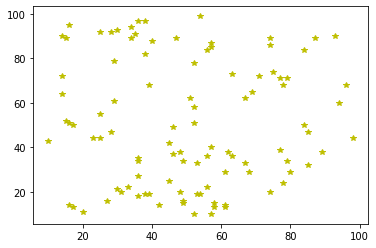

In [9]:
import torch
import matplotlib.pyplot as plt


%matplotlib inline

data1 = torch.randint(10, 100, (2, 100)).float()
# 用Z-Score进行归一化处理
data2 = (data1 - data1.mean()) / data1.std()
#对标准化后的数据进行可视化处理
plt.plot(data1[0].numpy(), data1[1].numpy(), "y*")

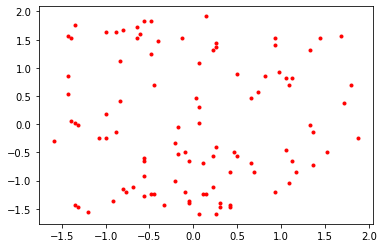

In [10]:
plt.plot(data2[0].numpy(), data2[1].numpy(), "r.")

### Min-Max标准化(归一化)处理

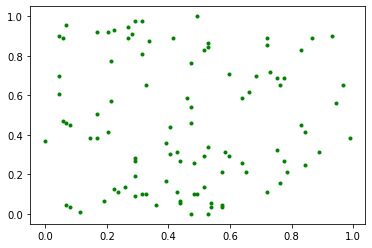

In [11]:
# Min-Max归一化处理
data3 = (data1 - data1.min()) / (data1.max() - data1.min())
plt.plot(data3[0].numpy(), data3[1].numpy(), "g.")

### 特征的正则化处理

In [12]:
tmp_data = [
    [1.0, 0.5, -1.0], 
    [2.0, 1.0, 1.0], 
    [4.0, 10.0, 2.0]]

data4 = torch.Tensor(tmp_data)
data4

tensor([[ 1.0000,  0.5000, -1.0000],
        [ 2.0000,  1.0000,  1.0000],
        [ 4.0000, 10.0000,  2.0000]])

In [13]:
data4 / (data4.pow(2).sum(dim=1).pow(1/2).unsqueeze(1))

tensor([[ 0.6667,  0.3333, -0.6667],
        [ 0.8165,  0.4082,  0.4082],
        [ 0.3651,  0.9129,  0.1826]])

In [14]:
data4.pow(2).sum(dim=1).pow(1/2).unsqueeze(1)

tensor([[ 1.5000],
        [ 2.4495],
        [10.9545]])

## 交叉验证

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split


df = pd.read_csv("Titanic-dataset/train.csv", encoding='utf8')
df_X = df[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 
           'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
df_Y = df["Survived"]

In [16]:
df_X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 普通交叉验证

In [17]:
train_X, test_X, train_Y, test_Y = train_test_split(df_X.values, df_Y.values, 
                                                    test_size=0.2, random_state=1314)
print("train_X.count:{}, test_X.count:{}, train_Y.count:{}, test_Y.count:{}".
      format(len(train_X), len(test_X), len(train_Y), len(test_Y)))

train_X.count:712, test_X.count:179, train_Y.count:712, test_Y.count:179


### K折交叉验证

In [18]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, random_state=1314, shuffle=True)
for train_index, test_index in kfold.split(df_X.values):
    print(len(train_index), len(test_index))

712 179
713 178
713 178
713 178
713 178


In [19]:
# 模拟“听”和“闻”信号
signals = {"嗅觉信号": "闻", "听觉信号": "听", "视觉信号": "看"}


class Neuron(object):
    def __init__(self, signal_type):
        # 模拟神经元处理某种信号的能力，signal_type为突触携带的参数
        self.signal_type = signal_type
        
    def active(self, x):
        # 输入某种类型的信号，有可能激活神经元响应刺激
        if x.signal_type == self.signal_type:
            return signals[self.signal_type] + ":" + x.data
        else:
            return signals[self.signal_type] + ":" + "什么都没有" + signals[self.signal_type] + "到"
        
        
class SignalInput(object):
    # 输入信号
    def __init__(self, signal_type, data):
        self.signal_type = signal_type
        self.data = data
        
    
test = SignalInput("嗅觉信号","臭豆腐好香呀！")
print(Neuron("嗅觉信号").active(test))

闻:臭豆腐好香呀！


In [20]:
test = SignalInput("视觉信号","那个小姐姐真漂亮！")
print(Neuron("视觉信号").active(test))

看:那个小姐姐真漂亮！


In [21]:
test = SignalInput("视觉信号","那个小姐姐真漂亮！")
print(Neuron("嗅觉信号").active(test))

闻:什么都没有闻到


### 脑区功能划分

In [22]:
from collections import Counter
from random import randint


class HearBrainArea(object):
    # 听觉皮层脑区
    def __init__(self, num):
        self.neurons = [Neuron("听觉信号") for i in range(num)]
    
    def process(self, x):
        # 处理传入的信号
        print("听觉皮层正在处理：" + x.data)
        

class SmellBrainArea(object):
    # 嗅觉皮层
    def __init__(self, num):
        self.neurons = [Neuron("嗅觉信号") for i in range(num)]
    
    def process(self, x):
        # 处理信号
        print("嗅觉皮层正在处理：" + x.data)
        
        
#构建器官，如嘴巴和耳朵，将接受的信号分配给专门的大脑皮层进行处理
class Brain(object):
    def __init__(self):
        # 控制神经元数量，随机初始化
        self.hear_area = HearBrainArea(randint(1000, 10000))
        self.smell_area = SmellBrainArea(randint(1000, 10000))
        
    def process(self, x):
        result = {"嗅觉信号": lambda x: self.smell_area.process(x), 
                  "听觉信号": lambda x: self.hear_area.process(x)}[x.signal_type](x)
        
        
brain = Brain()
hear = SignalInput("听觉信号", "好美的歌！")
smell = SignalInput("嗅觉信号", "臭豆腐真香， 想吃！")
brain.process(hear)

听觉皮层正在处理：好美的歌！


In [23]:
brain.process(smell)

嗅觉皮层正在处理：臭豆腐真香， 想吃！


### 相同神经元投票决定输出信号

In [24]:
np.random.seed(1314)


class HearBrainArea(object):
    # 听觉皮层脑区
    def __init__(self, num):
        self.neurons = [Neuron("听觉信号") for i in range(num)]
    
    def process(self, x):
        # 处理传入的信号
        print("听觉皮层正在处理：" + x.data)
        # 所有神经元的动作集合
        actions = [neuron.active(x) for neuron in self.neurons]
        # 从所有动作中投票决定最终响应
        final_action = Counter(actions).most_common(1)
        print("耳朵听【听觉皮层】：" + final_action[0][0])
        

class SmellBrainArea(object):
    # 嗅觉皮层
    def __init__(self, num):
        self.neurons = [Neuron("嗅觉信号") for i in range(num)]
    
    def process(self, x):
        # 处理信号
        print("嗅觉皮层正在处理：" + x.data)
        # 所有神经元的动作集合
        actions = [neuron.active(x) for neuron in self.neurons]
        # 从所有动作中投票决定最终响应
        final_action = Counter(actions).most_common(1)
        print("鼻子闻【嗅觉皮层】：" + final_action[0][0])
        
        
brain = Brain()
hear = SignalInput("听觉信号", "小黄鹂在唱歌")
smell = SignalInput("嗅觉信号", "臭豆腐闻起来真臭")
brain.process(hear)

听觉皮层正在处理：小黄鹂在唱歌
耳朵听【听觉皮层】：听:小黄鹂在唱歌


In [25]:
brain.process(smell)

嗅觉皮层正在处理：臭豆腐闻起来真臭
鼻子闻【嗅觉皮层】：闻:臭豆腐闻起来真臭


### 大脑皮层的可替换性

In [26]:
from random import random


class Neuron(object):
    def __init__(self, signal_type):
        # 模拟神经元处理某种信号的能力，signal_type为突触携带的参数
        self.signal_type = signal_type
    
    def active(self, x):
        # 输入某种类型的信号，有可能激活神经元响应刺激，假设有5%的概率被训练改变
        if random() <= 0.05:
            self.signal_type = x.signal_type
        if x.signal_type == self.signal_type:
            return signals[self.signal_type] + ":" + x.data
        else:
            return signals[self.signal_type] + ":" + "什么都没有" + signals[self.signal_type] + "到"
        

# 连续输入100次，看看神经元处理类型的变化
brain = Brain()
hear = SignalInput("听觉信号", "小黄鹂在唱歌")
for i in range(20):
    brain.smell_area.process(hear)

嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：闻:什么都没有闻到
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：闻:什么都没有闻到
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：闻:什么都没有闻到
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：闻:什么都没有闻到
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：闻:什么都没有闻到
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：闻:什么都没有闻到
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：闻:什么都没有闻到
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：闻:什么都没有闻到
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：闻:什么都没有闻到
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：闻:什么都没有闻到
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：闻:什么都没有闻到
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：闻:什么都没有闻到
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：闻:什么都没有闻到
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：听:小黄鹂在唱歌
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：听:小黄鹂在唱歌
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：听:小黄鹂在唱歌
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：听:小黄鹂在唱歌
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：听:小黄鹂在唱歌
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：听:小黄鹂在唱歌
嗅觉皮层正在处理：小黄鹂在唱歌
鼻子闻【嗅觉皮层】：听:小黄鹂在唱歌


In [27]:
for i in range(20):
    print(brain.smell_area.neurons[i].signal_type)

嗅觉信号
听觉信号
听觉信号
听觉信号
听觉信号
听觉信号
听觉信号
听觉信号
听觉信号
听觉信号
听觉信号
听觉信号
听觉信号
听觉信号
听觉信号
嗅觉信号
听觉信号
嗅觉信号
嗅觉信号
听觉信号


In [28]:
import random


x = np.arange(20)
y = np.array([5 * x[i] + randint(1, 20) for i in range(len(x))])
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [29]:
y

array([  9,  22,  16,  24,  34,  40,  44,  38,  56,  59,  67,  65,  71,
        75,  79,  88,  94,  92, 100, 113])

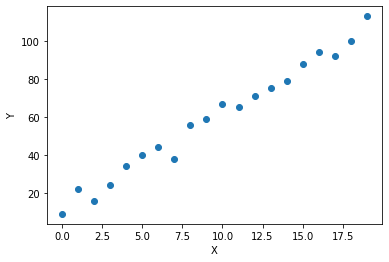

In [30]:
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [31]:
x_train = torch.from_numpy(x).float()
y_train = torch.from_numpy(y).float()

In [32]:
x_train

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

In [33]:
y_train

tensor([  9.,  22.,  16.,  24.,  34.,  40.,  44.,  38.,  56.,  59.,  67.,  65.,
         71.,  75.,  79.,  88.,  94.,  92., 100., 113.])

In [34]:
import torch.nn as nn


class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        # 输入输出都是一维
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        return self.linear(x)

Epoch: [1/10], loss: [4112.6382]
Epoch: [2/10], loss: [2345.5811]


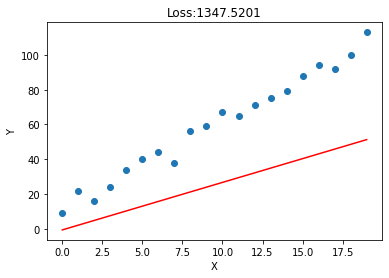

Epoch: [3/10], loss: [1347.5201]
Epoch: [4/10], loss: [783.7930]


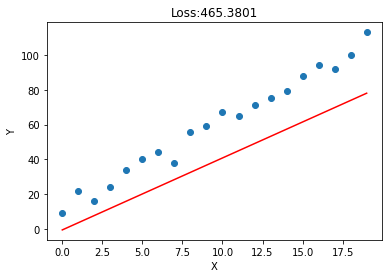

Epoch: [5/10], loss: [465.3801]
Epoch: [6/10], loss: [285.5215]


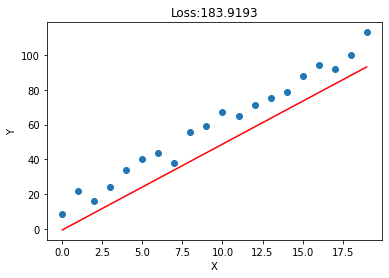

Epoch: [7/10], loss: [183.9193]
Epoch: [8/10], loss: [126.5169]


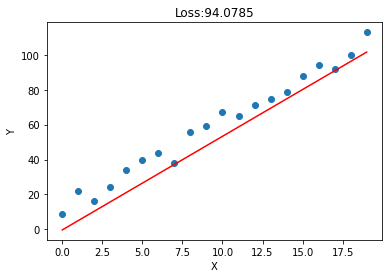

Epoch: [9/10], loss: [94.0785]
Epoch: [10/10], loss: [75.7401]


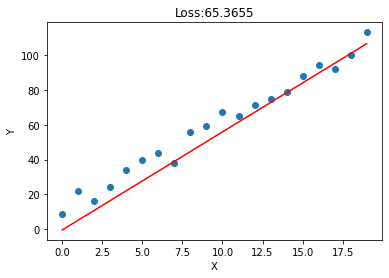

In [35]:
# 新建模型，误差函数，优化器
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)

num_epochs = 10
for i in range(num_epochs):
    input_data = x_train.unsqueeze(1)
    target = y_train.unsqueeze(1)
    out = model(input_data)
    loss = criterion(out, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print("Epoch: [{}/{}], loss: [{:.4f}]".format(i+1, num_epochs, loss.item()))
    if (i+1) % 2 == 0:
        predict = model(input_data)
        plt.plot(x_train.data.numpy(), predict.squeeze(1).data.numpy(), "r")
        loss = criterion(predict, target)
        plt.title("Loss:{:.4f}".format(loss.item()))
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.scatter(x_train, y_train)
        plt.show()

### 多项式回归

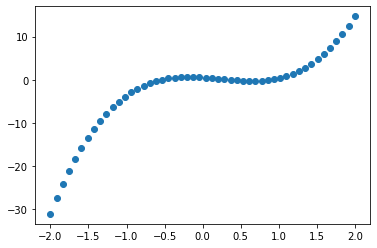

In [36]:
# 多项式方程f(x)=-1.13x-2.14x^2+3.15x^3-0.01x^4+0.512
### 多项式回归数据准备

x = torch.linspace(-2, 2, 50)
y = -1.13 * x - 2.14 * torch.pow(x, 2) + 3.15 * torch.pow(x, 3) - 0.01 * torch.pow(x, 4) + 0.512
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

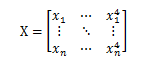

In [37]:
# 因为有4个变量，因此对于每个输入是一个向量，而不是一个标量数据，多条数据输入便形成了一个矩阵输入
from IPython.display import Image

Image("./Learn-Pytorch-And-Become-A-Data-Scientist-master/chapter2/imgs/1.png")

In [38]:
# 为了拼接上面的输入，需要编写辅助方法，输入一个标量x，
# 输入[x,x^2,x^3,x^4]向量组成的矩阵，使用torch.cat拼接

def features(x):
    # [x, x^2, x^3, x^4]
    x = x.unsqueeze(1)
    return torch.cat([x ** i for i in range(1, 5)], 1)

In [39]:
features(x)[:2]

tensor([[-2.0000,  4.0000, -8.0000, 16.0000],
        [-1.9184,  3.6801, -7.0598, 13.5434]])

In [40]:
# 目标公式，用于计算输入特征对应的标准输出
# 目标公式权重
x_weights = torch.Tensor([-1.13, -2.14, 3.15, -0.01]).unsqueeze(1)
b = torch.Tensor([0.512])


def target(x):
    # Tensor上的item方法用于获取标量Tensor中的数值
    return x.mm(x_weights) + b.item()

In [41]:
target(features(torch.Tensor([1])))

tensor([[0.3820]])

In [42]:
# 接下来新建一个随机生成输入数据和输出数据的函数，用于生成训练数据
def get_batch_data(batch_size):
    # 生成batch个随机的x
    batch_x = torch.randn(batch_size)
    # 对于每个x要计算[x,x^2,x^3,x^4],最终对于一个batch将生成一个矩阵
    # 直接调用上面的features方法生成矩阵
    features_x = features(batch_x)
    target_y = target(features_x)
    return features_x, target_y

In [43]:
get_batch_data(8)

(tensor([[ 5.9702e-01,  3.5643e-01,  2.1279e-01,  1.2704e-01],
         [ 9.9053e-01,  9.8115e-01,  9.7185e-01,  9.6265e-01],
         [ 1.1317e+00,  1.2808e+00,  1.4495e+00,  1.6405e+00],
         [ 2.8454e-02,  8.0965e-04,  2.3038e-05,  6.5554e-07],
         [ 5.6192e-01,  3.1575e-01,  1.7743e-01,  9.9699e-02],
         [ 3.4028e-01,  1.1579e-01,  3.9400e-02,  1.3407e-02],
         [ 6.1616e-01,  3.7966e-01,  2.3393e-01,  1.4414e-01],
         [-3.6106e-01,  1.3036e-01, -4.7069e-02,  1.6995e-02]]),
 tensor([[-0.2564],
         [ 0.3448],
         [ 1.0418],
         [ 0.4782],
         [-0.2408],
         [ 0.0037],
         [-0.2613],
         [ 0.4926]]))

In [44]:
#新建模型，继承自nn.Module，在init方法中使用Linear模型，注意此时的输入是4，对应目标函数的4个变量[x,x^2,x^3,x^4]
class PolynomialRegression(nn.Module):
    def __init__(self):
        super(PolynomialRegression, self).__init__()
        # 输入维度维4，输出维度维1
        self.poly = nn.Linear(4, 1)
        
    def forward(self, x):
        return self.poly(x)

Epoch: [1/10000], loss: [27.616301]


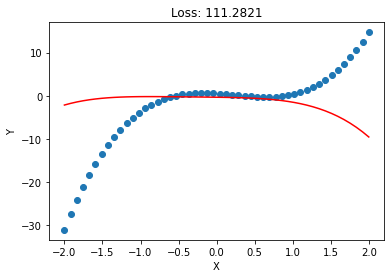

Epoch: [101/10000], loss: [5.109170]
Epoch: [201/10000], loss: [3.360312]
Epoch: [301/10000], loss: [0.940167]
Epoch: [401/10000], loss: [0.939307]
Epoch: [501/10000], loss: [1.123698]
Epoch: [601/10000], loss: [0.956815]
Epoch: [701/10000], loss: [0.679401]
Epoch: [801/10000], loss: [0.572641]
Epoch: [901/10000], loss: [0.553409]
Epoch: [1001/10000], loss: [8.122110]


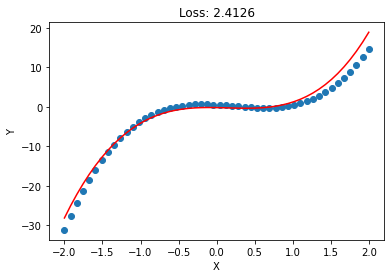

Epoch: [1101/10000], loss: [0.442465]
Epoch: [1201/10000], loss: [0.389357]
Epoch: [1301/10000], loss: [0.336778]
Epoch: [1401/10000], loss: [0.322309]
Epoch: [1501/10000], loss: [0.280802]
Epoch: [1601/10000], loss: [0.342007]
Epoch: [1701/10000], loss: [0.133023]
Epoch: [1801/10000], loss: [0.382924]
Epoch: [1901/10000], loss: [0.114683]
Epoch: [2001/10000], loss: [0.111109]


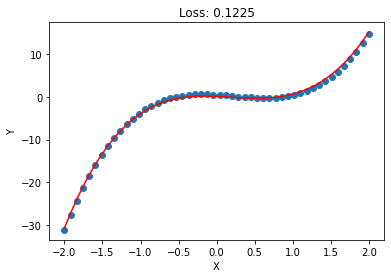

Epoch: [2101/10000], loss: [0.111699]
Epoch: [2201/10000], loss: [0.095343]
Epoch: [2301/10000], loss: [0.076753]
Epoch: [2401/10000], loss: [0.073421]
Epoch: [2501/10000], loss: [0.041885]
Epoch: [2601/10000], loss: [0.293991]
Epoch: [2701/10000], loss: [0.055948]
Epoch: [2801/10000], loss: [0.104051]
Epoch: [2901/10000], loss: [0.059408]
Epoch: [3001/10000], loss: [0.037866]


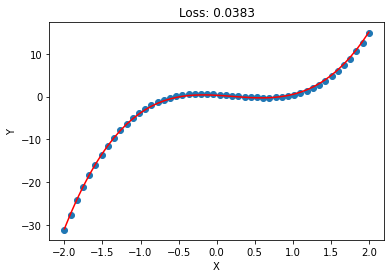

Epoch: [3101/10000], loss: [0.034211]
Epoch: [3201/10000], loss: [0.022031]
Epoch: [3301/10000], loss: [0.027454]
Epoch: [3401/10000], loss: [0.020700]
Epoch: [3501/10000], loss: [0.017689]
Epoch: [3601/10000], loss: [0.013964]
Epoch: [3701/10000], loss: [0.009769]
Epoch: [3801/10000], loss: [0.013120]
Epoch: [3901/10000], loss: [0.015935]
Epoch: [4001/10000], loss: [0.014516]


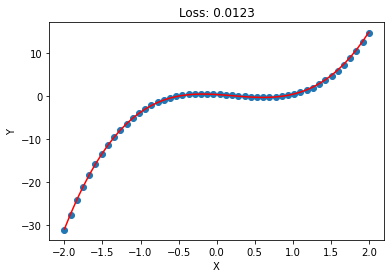

Epoch: [4101/10000], loss: [0.009983]
Epoch: [4201/10000], loss: [0.008735]
Epoch: [4301/10000], loss: [0.005736]
Epoch: [4401/10000], loss: [0.005740]
Epoch: [4501/10000], loss: [0.006758]
Epoch: [4601/10000], loss: [0.004228]
Epoch: [4701/10000], loss: [0.006709]
Epoch: [4801/10000], loss: [0.003586]
Epoch: [4901/10000], loss: [0.002798]
Epoch: [5001/10000], loss: [0.002963]


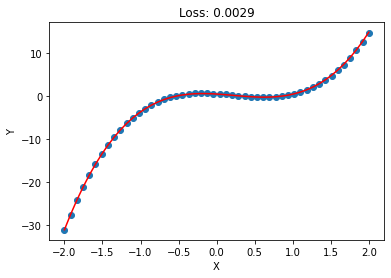

Epoch: [5101/10000], loss: [0.002988]
Epoch: [5201/10000], loss: [0.001814]
Epoch: [5301/10000], loss: [0.001920]
Epoch: [5401/10000], loss: [0.001471]
Epoch: [5501/10000], loss: [0.001655]
Epoch: [5601/10000], loss: [0.001302]
Epoch: [5701/10000], loss: [0.000968]
Epoch: [5801/10000], loss: [0.001133]
Epoch: [5901/10000], loss: [0.000941]
Epoch: [6001/10000], loss: [0.000999]


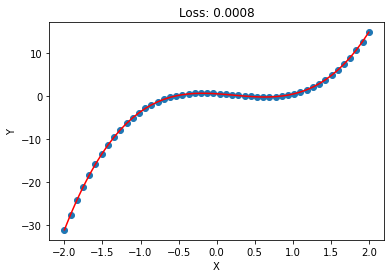

Epoch: [6101/10000], loss: [0.000636]
Epoch: [6201/10000], loss: [0.000740]
Epoch: [6301/10000], loss: [0.000591]
Epoch: [6401/10000], loss: [0.000383]
Epoch: [6501/10000], loss: [0.000643]
Epoch: [6601/10000], loss: [0.000376]
Epoch: [6701/10000], loss: [0.000289]
Epoch: [6801/10000], loss: [0.000197]
Epoch: [6901/10000], loss: [0.000192]
Epoch: [7001/10000], loss: [0.000139]


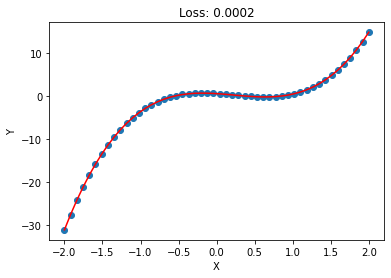

Epoch: [7101/10000], loss: [0.000141]
Epoch: [7201/10000], loss: [0.000132]
Epoch: [7301/10000], loss: [0.000129]
Epoch: [7401/10000], loss: [0.000462]
Epoch: [7501/10000], loss: [0.000159]
Epoch: [7601/10000], loss: [0.000065]
Epoch: [7701/10000], loss: [0.000658]
Epoch: [7801/10000], loss: [0.000059]
Epoch: [7901/10000], loss: [0.000038]
Epoch: [8001/10000], loss: [0.000036]


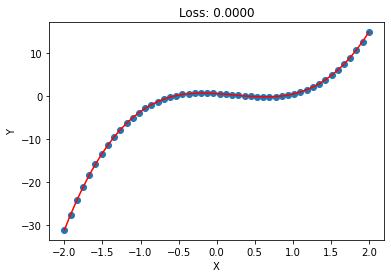

Epoch: [8101/10000], loss: [0.000174]
Epoch: [8201/10000], loss: [0.000036]
Epoch: [8301/10000], loss: [0.000038]
Epoch: [8401/10000], loss: [0.000061]
Epoch: [8501/10000], loss: [0.000021]
Epoch: [8601/10000], loss: [0.000024]
Epoch: [8701/10000], loss: [0.000013]
Epoch: [8801/10000], loss: [0.000021]
Epoch: [8901/10000], loss: [0.000009]
Epoch: [9001/10000], loss: [0.000020]


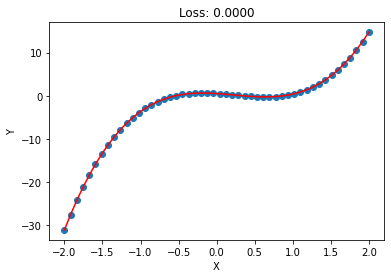

Epoch: [9101/10000], loss: [0.000010]
Epoch: [9201/10000], loss: [0.000032]
Epoch: [9301/10000], loss: [0.000007]
Epoch: [9401/10000], loss: [0.000007]
Epoch: [9501/10000], loss: [0.000005]
Epoch: [9601/10000], loss: [0.000006]
Epoch: [9701/10000], loss: [0.000007]
Epoch: [9801/10000], loss: [0.000003]
Epoch: [9901/10000], loss: [0.000002]


In [45]:
# 开始训练模型，误差函数仍然使用MSELoss，使用SGD随机梯度下降优化参数
epochs = 10000
batch_size = 32
model = PolynomialRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), 0.001)
for epoch in range(epochs):
    batch_x, batch_y = get_batch_data(batch_size)
    out = model(batch_x)
    loss = criterion(out, batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: [{}/{}], loss: [{:.6f}]".format(epoch+1, epochs, loss.item()))
    if epoch % 1000 == 0:
        predict = model(features(x))
        plt.plot(x.data.numpy(), predict.squeeze(1).data.numpy(), "r")
        loss = criterion(predict.squeeze(1), y)
        plt.title("Loss: {:.4f}".format(loss.item()))
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.scatter(x, y)
        plt.show()

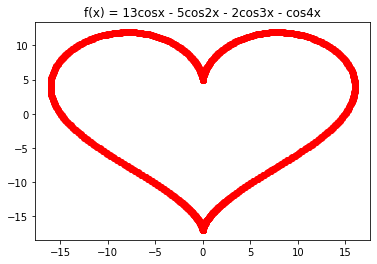

In [46]:
t = torch.linspace(-10,10,1000)
x = 16*torch.sin(t)**3
y = 13*torch.cos(t)-5*torch.cos(2*t)-2*torch.cos(3*t)-torch.cos(4*t)

plt.scatter(x.data.numpy(),y.data.numpy(),c="r")
plt.title("f(x) = 13cos⁡x - 5cos⁡2x - 2cos⁡3x - cos⁡4x")
plt.show()

### 逻辑回归

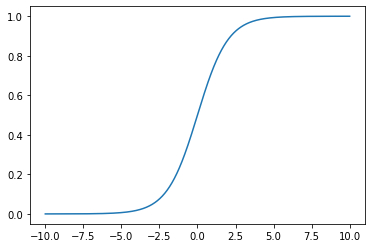

In [48]:
import math

x = torch.linspace(-10, 10, 1000)
y = 1/(1+torch.pow(math.e, -x))
plt.plot(x.data.numpy(), y.data.numpy())
plt.show()

#### 构造测试数据

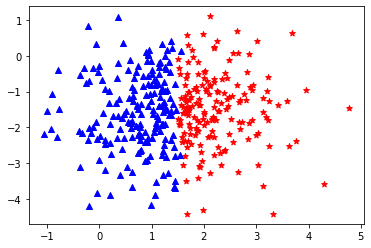

In [80]:
x1 = torch.randn(365) + 1.5
x2 = torch.randn(365) - 1.5
data = zip(x1.data.numpy(), x2.data.numpy())
pos = []
neg = []


def classification(data):
    for i in data:
        if (i[0] > 1.5+0.1*torch.rand(1).item()*(-1)**torch.randint(1, 10, (1, 1)).item()):
            pos.append(i)
        else:
            neg.append(i)
            

classification(data)
pos_x = [i[0] for i in pos]
pos_y = [i[1] for i in pos]
neg_x = [i[0] for i in neg]
neg_y = [i[1] for i in neg]
plt.scatter(pos_x, pos_y, c="r", marker="*")
plt.scatter(neg_x, neg_y, c='b', marker="^")
plt.show()

In [82]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        return self.sigmoid(self.linear(x))

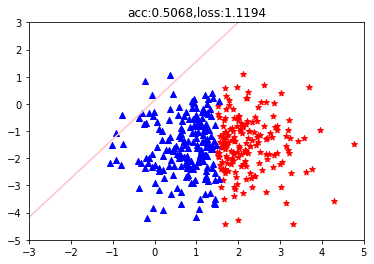

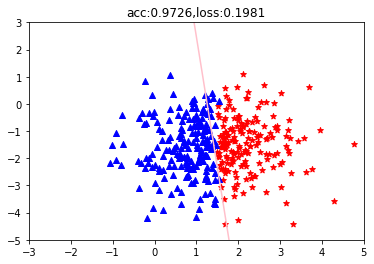

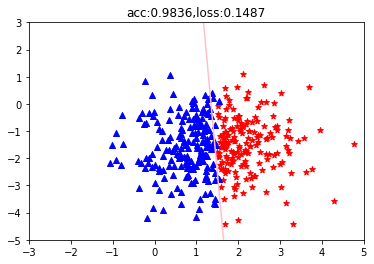

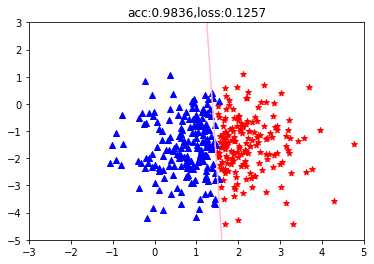

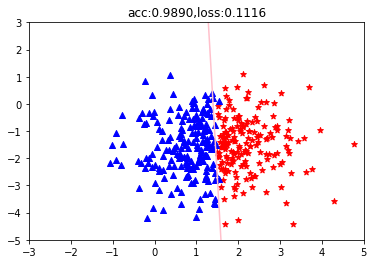

In [107]:
model = LogisticRegression()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), 0.01)

epochs = 50000
features = [[i[0], i[1]] for i in pos]
features.extend([[i[0], i[1]] for i in neg])
features = torch.Tensor(features)
label = [1 for i in range(len(pos))]
label.extend([0 for i in range(len(neg))])
label = torch.Tensor(label)

for i in range(epochs):
    out = model(features)
    # 以o.5为划分标签，大于0.5表示正类，标签为1，小于0.5为负类标签为0
    loss = criterion(out.squeeze(1), label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 分类任务准确率
    acc = (out.ge(0.5).float().squeeze(1) == label).sum().float() / features.size()[0]
    
    if i % 10000 == 0:
        plt.scatter(pos_x, pos_y, c="r", marker="*")
        plt.scatter(neg_x, neg_y, c='b', marker="^")
        weight = model.linear.weight[0]
        w0 = weight[0]
        w1 = weight[1]
        b = model.linear.bias.data[0]
        # 绘制出边界线
        test_x = torch.linspace(-10, 10, 500)
        test_y = (-w0 * test_x - b) / w1
        plt.plot(test_x.data.numpy(), test_y.data.numpy(), c="pink")
        plt.title("acc:{:.4f},loss:{:.4f}".format(acc, loss))
        plt.ylim(-5, 3)
        plt.xlim(-3, 5)
        plt.show()